In [2]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
import numpy as np

import matplotlib.pyplot as plt

**Model build**

In [3]:

# Load VGG16 model + higher level layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
predictions = Dense(56, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of VGG16
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Import and Training**

In [5]:
datagen = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)


train_generator = datagen.flow_from_directory('../content/gdrive/MyDrive/Dataset', target_size=(224, 224), batch_size=32, class_mode='categorical', subset='training')
validation_generator = datagen.flow_from_directory('../content/gdrive/MyDrive/Dataset', target_size=(224, 224), batch_size=32, class_mode='categorical', subset='validation')

h = model.fit(train_generator, validation_data=validation_generator, epochs=30)


Found 344 images belonging to 56 classes.
Found 72 images belonging to 56 classes.
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ━━━━━━━━━━━━━━━━━━━━ 330s 14s/step - accuracy: 0.1260 - loss: 19.3735 - val_accuracy: 0.2639 - val_loss: 8.4259
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.6687 - loss: 1.2791 - val_accuracy: 0.3611 - val_loss: 6.5937
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 39s 863ms/step - accuracy: 0.8358 - loss: 0.4911 - val_accuracy: 0.4306 - val_loss: 5.7474
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 43s 952ms/step - accuracy: 0.8974 - loss: 0.4397 - val_accuracy: 0.3750 - val_loss: 5.5890
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.9301 - loss: 0.2703 - val_accuracy: 0.3750 - val_loss: 5.9775
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.9585 - loss: 0.1202 - val_accuracy: 0.3889 - val_loss: 6.1423
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.9646 - loss: 0.0941 - val_accuracy: 0.4167 - val_loss: 6.2345
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9627 - loss: 0.1008 - val_accuracy: 0.4167 - val_loss: 6

In [10]:
# Save the trained model
model.save('../content/gdrive/MyDrive/Dataset/face_recognition_model.keras')

In [11]:
#from google.colab import drive
#drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Found 344 images belonging to 56 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


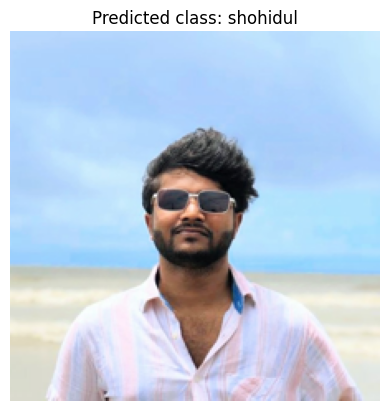

In [12]:
from google.colab import drive
drive.mount('/content/gdrive')

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

from tensorflow.keras.models import load_model
from PIL import Image # Import the Image module from PIL
import matplotlib.pyplot as plt # Import matplotlib for plotting

datagen = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)

train_generator =  datagen.flow_from_directory('../content/gdrive/MyDrive/Dataset', target_size=(448, 448), batch_size=32, class_mode='categorical', subset='training')

class_labels = {v: k for k, v in train_generator.class_indices.items()}

# Load and preprocess the image

#Fixed the path, removed the shortcut part of the path
img_path = '../content/gdrive/MyDrive/Dataset/shohidul/shohidul.jpg' # Enter valid image path
img = Image.open(img_path)
img = img.resize((224, 224))
img_array = np.array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)



model = load_model('../content/gdrive/MyDrive/Dataset/face_recognition_model.keras')

# Get predictions
prediction = model.predict(img_array)

# Get the index of the class with the highest probability
predicted_class_index = np.argmax(prediction)

# Get the predicted label using the class_labels dictionary
predicted_label = class_labels[predicted_class_index]

# Display the image with annotation
plt.imshow(img)
plt.title(f'Predicted class: {predicted_label}') # Use the defined predicted_label variable
plt.axis('off')  # Turn off axis labels
plt.show()

In [13]:
!pip install opencv-python tensorflow



In [14]:
!pip install --upgrade opencv-python

In [18]:
import cv2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
from tensorflow.keras.models import load_model

# Load the pre-trained model
model = load_model('../content/gdrive/MyDrive/Dataset/face_recognition_model.keras')

# Load the Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


# If you have multiple cameras try changing the index to 1 or 2
#cap = cv2.VideoCapture(0)
cap = cv2.VideoCapture(1)

# Check if the webcam is opened correctly
if not cap.isOpened():
    # Try different camera indices if the default one doesn't work
    cap = cv2.VideoCapture(1)
    if not cap.isOpened():
        cap = cv2.VideoCapture(2)
        if not cap.isOpened():
            raise IOError("Cannot open webcam")



# Class labels mapping (adjust the labels based on your training data)
class_labels = {
    predicted_label
   }

image_counter = 0  # Counter to save images

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Check if frame is read correctly
    if not ret:
        break

    # Convert the frame to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    # Iterate through each detected face
    for (x, y, w, h) in faces:
        # Draw a rectangle around the face
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

        # Extract the region of interest (face)
        face_roi = frame[y:y+h, x:x+w]

        # Preprocess the face for the model
        face_roi_resized = cv2.resize(face_roi, (224, 224))
        face_roi_array = image.img_to_array(face_roi_resized)
        face_roi_array = np.expand_dims(face_roi_array, axis=0)
        face_roi_array = preprocess_input(face_roi_array)

        # Make predictions
        predictions = model.predict(face_roi_array)
        predicted_class = np.argmax(predictions, axis=1)[0]

        # Get the predicted label
        predicted_label = class_labels.get(predicted_class, "Unknown")

        # Display the name of the predicted person on the frame
        cv2.putText(frame, predicted_label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)

    # Display the resulting frame
    cv2.imshow('Face Recognition', frame)

    # Press space to capture and save the image
    key = cv2.waitKey(1) & 0xFF
    if key == ord(' '):  # Space bar
        pass # Or any other code you want to execute when space is pressed.

OSError: Cannot open webcam